# Determine the type of cells through the data matrix of gene expression

Group member: Zhen Gu, Qihui Du, Yang Yang

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Background and Data 
The study of this project is to determine the type of cells through the data matrix of gene expression.
The dataset of this question includes the data matrix (deng-logcounts.csv) and cell type data (deng-celltype6.csv) of gene expression in each cell.
In the data matrix, there are 22431 rows and 268 columns, each row represents a gene feature, and each column represents a cell (to be determined to be classified).



The data were obtained from the Biological Laboratory of Fudan University.

In [5]:
df = pd.read_csv("deng-logcounts.csv")
df.head()

,Unnamed: 0,16cell,16cell.1,16cell.2,16cell.3,16cell.4,16cell.5,16cell.6,16cell.7,16cell.8,...,midblast.54,midblast.55,midblast.56,midblast.57,midblast.58,midblast.59,zy,zy.1,zy.2,zy.3
0,Hvcn1,1.761892,7.659105,0.000000,7.431404,0.000000,0.000000,0.000000,0.000000,7.448990,...,0.000000,3.592923,0.718593,0.000000,5.459118,0.000000,10.134836,9.951005,9.911294,9.917203
1,Gbp7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.596225,7.296112,8.243280,8.334323
2,Arrdc1,11.391550,9.996722,10.848717,10.243523,10.811142,0.000000,10.601814,10.838680,11.070853,...,8.183103,9.845744,8.821002,3.451238,8.969970,1.924376,10.292369,9.679673,9.898017,9.802901
3,Ercc5,1.134689,1.243790,0.000000,0.000000,7.148973,0.000000,0.000000,9.480126,9.962201,...,0.000000,0.000000,10.264651,0.000000,9.395351,2.500686,8.932756,9.001146,9.395565,8.880398
4,Mrpl15,11.399873,11.109356,12.341293,12.573202,12.518002,12.473222,12.160086,12.263240,12.383963,...,11.364194,10.692704,10.483410,10.887322,10.789715,11.383623,0.000000,0.000000,4.220521,4.934530


 In the data matrix, all elements are greater than or equal to 0, and the mean (‘mean’ row in the figure), standard deviation (‘std’ row in the figure) and maximum value (max row in the figure) of each gene in all cells are all very close.




 # Summary Statistics

In [3]:
df.describe()

,16cell,16cell.1,16cell.2,16cell.3,16cell.4,16cell.5,16cell.6,16cell.7,16cell.8,16cell.9,...,midblast.54,midblast.55,midblast.56,midblast.57,midblast.58,midblast.59,zy,zy.1,zy.2,zy.3
count,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,...,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000,22431.000000
mean,2.776017,2.812792,2.705587,2.771147,2.954167,2.671225,2.670323,2.945084,2.960131,3.018439,...,2.969162,3.077258,3.165022,3.099363,3.360720,2.706645,3.811067,3.908843,4.029088,3.960094
std,4.288103,4.331574,4.239074,4.277928,4.352426,4.292316,4.277922,4.333451,4.347918,4.370435,...,4.372675,4.421800,4.395993,4.418485,4.410247,4.122954,4.263185,4.216990,4.190228,4.213690
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.264474,2.310874,3.025206,2.685517
75%,6.698097,6.787326,5.870755,6.339411,7.303213,6.020144,6.177175,7.213103,7.316892,7.364717,...,7.305207,7.766669,7.763333,7.737538,7.991711,4.032970,7.756675,7.752210,7.796825,7.782249
max,16.676445,16.375413,16.905351,16.500086,16.396926,16.784138,16.889264,16.652842,16.594934,16.566428,...,17.412061,17.425240,17.459422,17.767101,17.535523,16.923833,16.634706,16.440629,16.269554,16.279130


# Data Classifying

In the cell type data, there are six types of all cells, which are represented by Type 1 to Type 6 respectively. The distribution of the number of cells of each type is given in the figure below：
 

In [6]:

cell_feature = df.columns[1:]
print(cell_feature)
print(len(cell_feature))

Index(['16cell', '16cell.1', '16cell.2', '16cell.3', '16cell.4', '16cell.5',
       '16cell.6', '16cell.7', '16cell.8', '16cell.9',
       ...
       'midblast.54', 'midblast.55', 'midblast.56', 'midblast.57',
       'midblast.58', 'midblast.59', 'zy', 'zy.1', 'zy.2', 'zy.3'],
      dtype='object', length=268)
268


It can be seen that cell Type 5 accounted for about half of them, and the other five types of cells accounted for the remaining half.

# Solution Design
We tried supervised learning and unsupervised learning algorithms to predict the classification of cells.

For supervised learning, we choose to use a logistic regression model with the idea of maximum likelihood estimation to classify the data set and use the method of cross validation to divide the entire data set into a training set and a test set, using the training set to fit a logistic regression model and use the test set to verify the validity of this model. On the one hand, we used the accuracy rate (Accuracy) to evaluate the effectiveness of the model, and on the other hand, we also used the AUC to measure the prediction results.

For unsupervised learning, we used the k-means algorithm, a classic instance of the EM algorithm, to cluster the cell classification. This part first defines the Euclidean space distance between cells, and uses the k-means algorithm to find cluster centers. Finally, ARI and NMI are used to evaluate the clustering results.

At the same time,we also used the t-SNE algorithm to reduce the dimensionality of the data. After reducing the data to two dimensions, we marked the data points in the plane and visualized the classification.

In [7]:
df_ans = pd.read_csv("deng-celltype6.csv")
print(df_ans.head)
ans_labels = list(df_ans.loc[:,'x'])

for i in range(1,7):
    print("Type %d cell type number %d" % (i, ans_labels.count(i)))

<bound method NDFrame.head of      Unnamed: 0  x
0             1  1
1             2  1
2             3  1
3             4  1
4             5  1
..          ... ..
263         264  5
264         265  4
265         266  4
266         267  4
267         268  4

[268 rows x 2 columns]>
Type 1 cell type number 50
Type 2 cell type number 14
Type 3 cell type number 37
Type 4 cell type number 12
Type 5 cell type number 133
Type 6 cell type number 22


# Unsupervised Learning: Adoption of k-means to Cluster Cell Species

The core of EM's algorithm is E-step (expectation step) and M-step (maximization step), while k-means can also be considered two-stage, with the overall idea being an iterative optimization process in which the cluster center can be seen as a parameter and the category to which the sample belongs can be viewed as a hidden variable.
Phase 1 (E-step for EM algorithms): Under the given cluster center at present, assign each sample to the category to which the nearest cluster center belongs (i.e., It is expected for each object to belong to the nearest category). In this process, the center of clustering remains the same.


In [5]:
# (1) 
from sklearn.cluster import KMeans
X_train = df.loc[:,list(cell_feature)].to_numpy().T # Convert to numpy arrays
# print(X_train.shape)
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters).fit(X_train)
kmeans_labels = kmeans.labels_
# print(len(kmeans.labels_))


The second part (M-step for EM algorithms): The center of each cluster was redefined so that the sum of the distances between the object assigned to the category and the new center was minimal (maximum similarity of objects assigned to the same category). During this process, the category to which each sample belongs remains the same.

In [6]:
# (2)
# Manually Inplemented kmeans algorithm

def randCent(dataMat, k):

    m, n = np.shape(dataMat)
    # Initialize the center of mass, create a k*n matrix filled with zeros
    centroids = np.mat(np.zeros((k, n)))

    for j in range(n):
        
        minJ = min(dataMat[:, j])

        rangeJ = float(max(dataMat[:, j]) - minJ)
        # Calculate the center of mass of each column, and assign the value to centroids
        centroids[:, j] = np.mat(minJ + rangeJ * np.random.rand(k, 1))

    return centroids

#kmeans 
def distEclud(array1,array2):
    return np.sqrt(np.sum(np.power(array1 - array2, 2)))

def kMeans(dataMat, k, distMeas=distEclud, createCent=randCent):
  
    m, n = np.shape(dataMat)
   
    clusterAssment = np.mat(np.zeros((m, 2)))

    centroids = createCent(dataMat, k)
    # Initialize the flag variable to determine if the iteration continues, if True, the iteration will continue.
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # Iterate through all the data to find the nearest center of mass to each point
        # Do this by traversing all centers of mass for each point and calculating the distance from the point to each center of mass
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
            
                distJI = distMeas(centroids[j, :], dataMat[i, :])
               
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 
            if clusterAssment[i, 0] != minIndex: clusterChanged = True
            # 
            clusterAssment[i, :] = minIndex, minDist ** 2
        # print(centroids)
        # 
        for cent in range(k):
            # 
            ptsInClust = dataMat[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
        print(centroids)
        print(clusterAssment)
    # 
    return centroids, clusterAssment

X_train = np.array(df.loc[:,list(cell_feature)]).T
X_train=np.mat(X_train)

_,cluster=kMeans(X_train,6,distEclud,randCent)

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train)



[[6.10399821 3.13065723 8.59664985 ... 0.         0.42316234 4.26547516]
 [1.29677069 2.96235983 8.73131409 ... 0.         0.31244961 5.41202999]
 [6.99806147 4.69694774 6.29455421 ... 0.         1.92516696 6.16917803]
 [7.22713371 5.0174736  9.15937856 ... 0.         1.89774286 5.64786036]
 [3.82648795 0.4448707  5.43064406 ... 0.01228717 0.20044677 5.82809508]
 [4.77175855 1.16380807 5.67113702 ... 0.         0.12734543 4.84218105]]
[[1.00000000e+00 4.91705037e+05]
 [0.00000000e+00 4.92306769e+05]
 [4.00000000e+00 4.86833919e+05]
 [4.00000000e+00 4.86802811e+05]
 [4.00000000e+00 4.74432970e+05]
 [4.00000000e+00 5.02284805e+05]
 [4.00000000e+00 5.00766406e+05]
 [4.00000000e+00 4.77006507e+05]
 [4.00000000e+00 4.74371694e+05]
 [4.00000000e+00 4.71420499e+05]
 [4.00000000e+00 4.73287990e+05]
 [4.00000000e+00 5.00446173e+05]
 [4.00000000e+00 4.65668658e+05]
 [4.00000000e+00 4.79338964e+05]
 [4.00000000e+00 4.72494597e+05]
 [4.00000000e+00 5.31742013e+05]
 [4.00000000e+00 5.45654127e+05]


In [7]:
# (3) 
#  Using GMM in sklearn
from sklearn.mixture import GaussianMixture
X_train = df.loc[:,list(cell_feature)].to_numpy().T
n_clusters = 6
gmm = GaussianMixture(n_components=n_clusters, covariance_type='diag') 
gmm.fit(X_train)
gmm_labels = gmm.predict(X_train)
print(len(gmm_labels))


268


In [8]:
# Calculate NMI and ARI still using sklearn

from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
NMI_gmm = normalized_mutual_info_score(ans_labels, gmm_labels)
ARI_gmm = adjusted_rand_score(ans_labels, gmm_labels)
print("NMI for GMM %lf, ARI for GMM %lf" % (NMI_gmm, ARI_gmm))

NMI_kmeans = normalized_mutual_info_score(ans_labels, kmeans_labels)
ARI_kmeans = adjusted_rand_score(ans_labels, kmeans_labels)
print("NMI for kmeans %lf, ARI for kmeans %lf" % (NMI_kmeans, ARI_kmeans))


NMI for GMM 0.731198, ARI for GMM 0.683443
NMI for kmeans 0.775291, ARI for kmeans 0.597769


The NMI = 0.659617 and ARI = 0.405131 were calculated by calling function. The result was not ideal. The GMM algorithm was also implemented by trying to call the library. NMI = 0.687105 and ARI = 0.551146 were not ideal either. In order to observe the classification visually and explore the reasons why unsupervised learning methods generally perform poorly in this problem, we use t-SNE for dimensionality reduction:

In [9]:
#ready for visualize
from sklearn.manifold import TSNE
X = df.loc[:, cell_feature].to_numpy().T
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(268, 2)

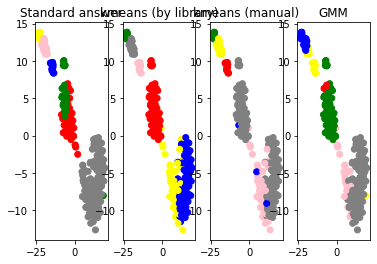

In [10]:
# plot all the result

# standard answer
color_map = {1:'red', 2:'blue', 3:'green', 4:'yellow', 5:'gray', 6:'pink'}
color_list = [color_map[l] for l in ans_labels]
plt.subplot(141)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=color_list)
plt.title("Standard answer")

#sklearn_kmeans
kmeans_color_map = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'gray', 5:'pink'}
kmeans_color_list = [kmeans_color_map[i] for i in kmeans.labels_]
plt.subplot(142)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=kmeans_color_list)
plt.title("kmeans (by library)")

#manual_kMeans
kMeans_color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'gray', 5: 'pink'}
kMeans_color_list = [kMeans_color_map[l[0,0]] for l in cluster[:,0]]
plt.subplot(143)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], color=kMeans_color_list)
plt.title("kmeans (manual)")

#sklearn_GMM
gmm_color_map = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'gray', 5:'pink'}
gmm_color_list = [gmm_color_map[i] for i in gmm_labels]
plt.subplot(144)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=gmm_color_list)
plt.title("GMM")


plt.show()



(A) actual classification; (B) k-means clustering results implemented by calling the library;
(C) manually-implemented k-means clustering results; (D) GMM clustering results realized by calling the library  


It can be seen that neither the python nor manual implementation is ideal, and neither the k-means nor GMM method is ideal.  The results in different dimensions of the clustering algorithm,illustrates that the problem can hardly be solved by using unsupervised learning algorithm.

This part used KMeans algorithm to cluster cells in unsupervised learning, but its effect is not ideal, with NMI = 0.659617 and ARI = 0.405131. We also used the dimensionality reduction technology of t-SNE to visualize, and we found out the characteristics of our data in clustering and explained why unsupervised learning did not work well.

# Supervised learning: classification of cell types using logistic regression models
The Logistic Regression model is a generalised linear model for solving dichotomous classification problems. It assumes that the dependent variable follows a Bernoulli distribution and introduces a non-linear factor through the Sigmoid function, so that it can easily handle dichotomous problems. Logistic regression is a model that uses maximum likelihood estimation. 
Logistic regression assumes that a model exists and that the parameter is estimated given the known outcome of the test. This parameter gives the probability that the sample will be a positive or negative sample.

The basic logistic regression algorithm described above is only applicable to binary classification problems, whereas the problem requires the determination of the classification of a cell out of six classifications, which is a multi-classification problem. For this reason, logistic regression needs to be modified using the one-versus-many (one-to-many) algorithm. 


The basic idea of the "one-to-many" algorithm is to transform an N classification problem into an N binary classification problem. For each classification, a "belong to this classification/not belong to this classification" decision is made. By labelling all those belonging to this classification as "positive samples" and those not belonging to this classification as "negative samples", a model can be trained to determine the probability that a sample "belongs to that category This way, a model can be trained to determine the probability that a sample "belongs to that category". For each of the N such binary classification models, such a probability is calculated, and the one with the highest probability is found to be the sample of that type.





In [11]:
# (3) Supervised learning
X = df.loc[:,list(cell_feature)].to_numpy().T
y = df_ans.loc[:,'x'].to_numpy()
print(X.shape)
print(y.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)

print(X_train.shape)
print(X_test.shape)


(268, 22431)
(268,)
(160, 22431)
(108, 22431)


In terms of the code implementation of this problem, it is after implementing the basic logistic regression, a judgement is made for each of the 6 types of cells, labeling the positive and negative
samples as described above and learning the properties of their samples.

In [12]:

print("Manually implemented logistic regression")

theta = np.zeros([X_train.shape[1], 6])
alpha = 0.000001
max_iter = 3001
for this_type in range(6):

    y_train_new = np.where(y_train == (this_type + 1), 1, 0)
    print('Training Model：Type %d' % (1+this_type))
    for step in range(max_iter):
        h = 1 / (1 + np.exp(-np.dot(X_train, theta[:, this_type])))
        theta[:, this_type] = theta[:, this_type] + alpha * np.dot( y_train_new.astype("float64") - h, X_train)
        
        if (step % 500 == 0):
            print("Step = %d, Error=%lf" % ( step , (y_train_new.astype("float64") - h).sum()))
        if (abs( (y_train_new.astype("float64") - h).sum()) < 0.00001):
            break


Manually implemented logistic regression
Training Model：Type 1
Step = 0, Error=-49.000000
Step = 500, Error=-0.003179
Step = 1000, Error=-0.001917
Step = 1500, Error=-0.001212
Step = 2000, Error=-0.000839
Step = 2500, Error=-0.000619
Step = 3000, Error=-0.000477
Training Model：Type 2
Step = 0, Error=-71.000000
Step = 500, Error=-0.009777
Step = 1000, Error=-0.004851
Step = 1500, Error=-0.003221
Step = 2000, Error=-0.002409
Step = 2500, Error=-0.001923
Step = 3000, Error=-0.001601
Training Model：Type 3
Step = 0, Error=-57.000000
Step = 500, Error=-0.013379
Step = 1000, Error=-0.007421
Step = 1500, Error=-0.005184
Step = 2000, Error=-0.003995
Step = 2500, Error=-0.003254
Step = 3000, Error=-0.002747
Training Model：Type 4
Step = 0, Error=-74.000000
Step = 500, Error=-0.009314
Step = 1000, Error=-0.004641
Step = 1500, Error=-0.003099
Step = 2000, Error=-0.002331
Step = 2500, Error=-0.001870
Step = 3000, Error=-0.001562
Training Model：Type 5
Step = 0, Error=-1.000000
Training Model：Type 6
S

After the implementation of multicategorical logistic regression was completed, the results were experimentally verified using the dataset of this problem. To make the results more convincing, the experiments are designed using a cross-validation approach, where the entire available dataset is randomly divided into two parts: a 'training set' and a 'test set'. The training set is used to train and fit the model, while the test set is used to validate the fitted model and observe the generality of the model. To do this, we first divided 70% of the 268 cells (188 cells) into a training set and 30% (80 cells) into a test set. Afterwards, 70% of this data was trained with its corresponding classification using a logistic regression model, which was fitted to obtain a logistic regression model.
The test results showed that this model was first fitted to the original training set and was found to be 100% correct.


In [19]:

h = 1 / (1 + np.exp(-np.dot(X_test, theta))) # Calculate the probability of each Type
y_predict = h.argmax(axis=1)+1 # To find the maximum value of the probability, you need to convert the table below to type by adding +1
print("Prediction", y_predict)
print("Answer", y_test)
correct_cnt = np.where(y_test == y_predict, 1, 0).sum()
print("Correct Rate：%lf (%d/%d)" %((correct_cnt/y_test.shape[0]), correct_cnt, y_test.shape[0]))

Prediction [3 5 3 3 5 6 5 2 1 1 1 5 5 3 5 5 5 5 3 5 3 5 5 5 4 2 5 5 5 5 1 5 2 5 4 6 5
 5 1 5 5 1 6 1 5 4 3 5 5 1 1 5 5 1 5 5 5 5 4 5 3 1 3 5 6 5 6 5 6 1 5 5 5 3
 6 6 5 5 1 4 5 5 5 1 5 5 1 5 3 5 5 5 3 1 5 2 3 2 3 1 4 6 5 5 1 1 5 6]
Answer [3 5 3 3 5 6 5 2 1 1 1 5 5 3 5 5 5 5 3 5 3 5 5 5 4 2 5 5 5 5 1 5 2 5 4 6 5
 5 1 5 5 1 6 1 5 4 3 5 5 1 1 5 5 1 5 5 5 5 4 5 3 1 3 5 6 5 6 5 6 1 5 5 5 3
 6 6 5 5 1 4 5 5 5 1 5 5 1 5 3 5 5 5 3 1 5 2 3 2 3 1 4 6 5 5 1 1 5 6]
Correct Rate：1.000000 (108/108)


This model was then tested on the remaining 30% of the model to observe the accuracy of the training, which was also found to be 100%. The AUC value can then be further calculated by converting the multiclassification to biclassification and is found to be AUC=1. This result not only shows that the model we have implemented is correct, but also that this given dataset is linearly divisible.



In [101]:
# test AUC

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize
y_one_hot = label_binarize(y_test,[1,2,3,4,5,6])  #Convert to a binary-like code
alpha = np.logspace(-2, 2, 20) 
model = LogisticRegressionCV(Cs = alpha, cv = 3, penalty = 'l2')#Using L2 regularization
model.fit(X_train, y_train)
model.C_    # Calculate the probability of belonging to each category and return the value of the shape = [n_samples, n_classes]
y_score = model.predict_proba(X_test)
# 1、Call the function to calculate the AUC of micro type
metrics.roc_auc_score(y_one_hot, y_score, average='micro') 
# 2、Manual calculation of AUC for micro type 
#First expand the matrices y_one_hot and y_score, and then calculate the false positive rate FPR and true case rate TPR
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
print("AUC=%lf"%auc)

AUC=1.000000


In [13]:


from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
score = LR.score(X_test, y_test)
print("Using python's own logistic regression")
print("Correct Rate: %lf%%"%(score*100))
print(LR.predict(X_test))
print(y_test)

Using python's own logistic regression
Correct Rate: 100.000000%
[3 5 3 3 5 6 5 2 1 1 1 5 5 3 5 5 5 5 3 5 3 5 5 5 4 2 5 5 5 5 1 5 2 5 4 6 5
 5 1 5 5 1 6 1 5 4 3 5 5 1 1 5 5 1 5 5 5 5 4 5 3 1 3 5 6 5 6 5 6 1 5 5 5 3
 6 6 5 5 1 4 5 5 5 1 5 5 1 5 3 5 5 5 3 1 5 2 3 2 3 1 4 6 5 5 1 1 5 6]
[3 5 3 3 5 6 5 2 1 1 1 5 5 3 5 5 5 5 3 5 3 5 5 5 4 2 5 5 5 5 1 5 2 5 4 6 5
 5 1 5 5 1 6 1 5 4 3 5 5 1 1 5 5 1 5 5 5 5 4 5 3 1 3 5 6 5 6 5 6 1 5 5 5 3
 6 6 5 5 1 4 5 5 5 1 5 5 1 5 3 5 5 5 3 1 5 2 3 2 3 1 4 6 5 5 1 1 5 6]


Although the logistic regression algorithm is only a linear model, it performs well on this problem beyond our wildest expectations.

In [20]:


#for percent in range(5, 100, 5):
#     X_train, X_test, y_train, y_test = train_test_split(
#          X, y, test_size=percent/100, random_state=0)
#        LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
#    score = LR.score(X_test, y_test)
#     print("Test set as a percentage of the entire data set: %lf, Correct Rate %lf"% (percent/100, score) )

    

# Conclusion
In this project, to solve the problem of classifying cells using genetic features, we have tried using supervised and unsupervised learning methods respectively. In supervised learning a logistic regression algorithm was used to achieve 100% correctness with AUC=1 and to explore the linear separability properties of its data itself using visualization methods. In unsupervised learning, the k-means algorithm was used with NMI=0.659617 and ARI=0.405131.


The results suggest that the supervised learning approach is more suitable for this problem and has the potential to be able to handle larger scale cell classification problems in the future.
